<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/indicator/nse_div_yld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

In [14]:
data= pd.read_csv("https://raw.githubusercontent.com/anirbanghoshsbi/.github.io/master/work/ml/data_fundamental.csv")

In [15]:
data=data.tail(750)

In [16]:
data.set_index('Date',inplace=True)

In [17]:
#data.set_index('Date',inplace=True)
data['mov50']= data['feat_Div_Yield'].rolling(window=18).mean()

In [18]:
data.tail(2)

,feat_PE,feat_PB,feat_Div_Yield,Open,High,Low,Close,mov50
Date,,,,,,,,
13-Feb-2025,20.51,3.43,1.45,23055.75,23235.5,22992.20,23031.40,1.383333
14-Feb-2025,20.42,3.41,1.46,23096.45,23133.7,22774.85,22929.25,1.389444


In [19]:
#data[['feat_Div_Yield','feat_PB','feat_PE','Open','High','Low','Close']].to_csv('data_fundamental.csv')

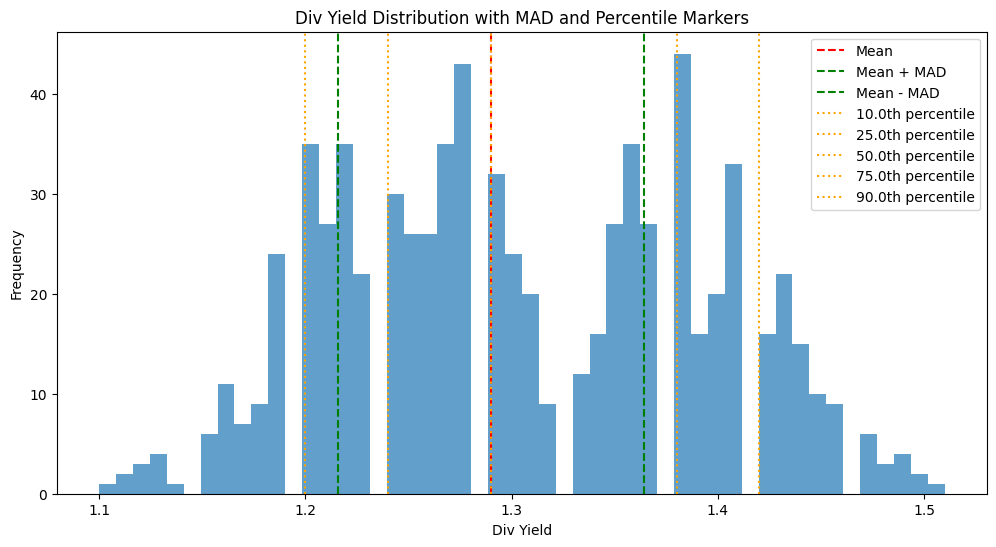

Mean P/E: 1.29
MAD: 0.07
Percentiles:
0.10    1.20
0.25    1.24
0.50    1.29
0.75    1.38
0.90    1.42
Name: feat_Div_Yield, dtype: float64

Current P/E: 20.42
MAD Score: 257.82 MADs from mean
Percentile Score: 100.00th percentile


In [20]:
# Assume 'pe_ratios' is your time series of P/E ratios
pe_ratios = data['feat_Div_Yield']

# Calculate mean and MAD
mean_pe = pe_ratios.median()
mad_pe = (pe_ratios - mean_pe).abs().mean()

# Calculate percentiles
percentiles = pe_ratios.quantile([0.1, 0.25, 0.5, 0.75, 0.9])
data['percentile']=percentiles
# Plot
plt.figure(figsize=(12, 6))
plt.hist(pe_ratios, bins=50, alpha=0.7)
plt.axvline(mean_pe, color='r', linestyle='dashed', label='Mean')
plt.axvline(mean_pe + mad_pe, color='g', linestyle='dashed', label='Mean + MAD')
plt.axvline(mean_pe - mad_pe, color='g', linestyle='dashed', label='Mean - MAD')

for p, v in percentiles.items():
    plt.axvline(v, color='orange', linestyle=':', label=f'{p*100}th percentile')

plt.title('Div Yield Distribution with MAD and Percentile Markers')
plt.xlabel('Div Yield')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Mean P/E: {mean_pe:.2f}")
print(f"MAD: {mad_pe:.2f}")
print("Percentiles:")
print(percentiles)

# Evaluate current P/E
current_pe = data['feat_PE'].iloc[-1]  # Example current P/E
mad_score = (current_pe - mean_pe) / mad_pe
percentile_score = sum(pe_ratios < current_pe) / len(pe_ratios) * 100

print(f"\nCurrent P/E: {current_pe}")
print(f"MAD Score: {mad_score:.2f} MADs from mean")
print(f"Percentile Score: {percentile_score:.2f}th percentile")

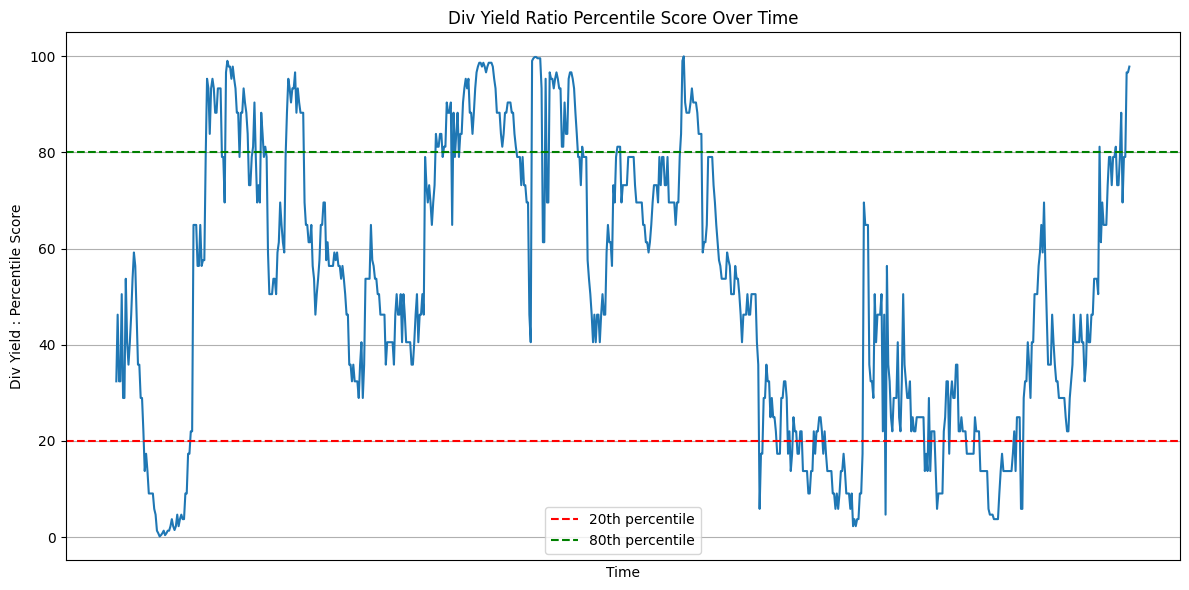

In [21]:
from scipy import stats

# Assuming you have a DataFrame 'df' with 'date' and 'pe' columns
# If not, you can create a sample DataFrame like this:
# df = pd.DataFrame({
#     'date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
#     'pe': np.random.uniform(10, 30, 100)
# })

# Calculate percentile scores
data['pe_percentile'] = stats.percentileofscore(data['feat_Div_Yield'], data['feat_Div_Yield'], kind='weak')


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(data['pe_percentile'].tail(1200))
plt.title('Div Yield Ratio Percentile Score Over Time')
plt.xlabel('Time')  # You can remove this line if you don't want any x-axis label
plt.ylabel('Div Yield : Percentile Score')
plt.grid(True)

# Remove x-axis ticks and labels
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().xaxis.set_minor_locator(plt.NullLocator())

# Add horizontal lines at 20th and 80th percentiles
plt.axhline(y=20, color='r', linestyle='--', label='20th percentile')
plt.axhline(y=80, color='g', linestyle='--', label='80th percentile')

plt.legend()
plt.tight_layout()
plt.show()

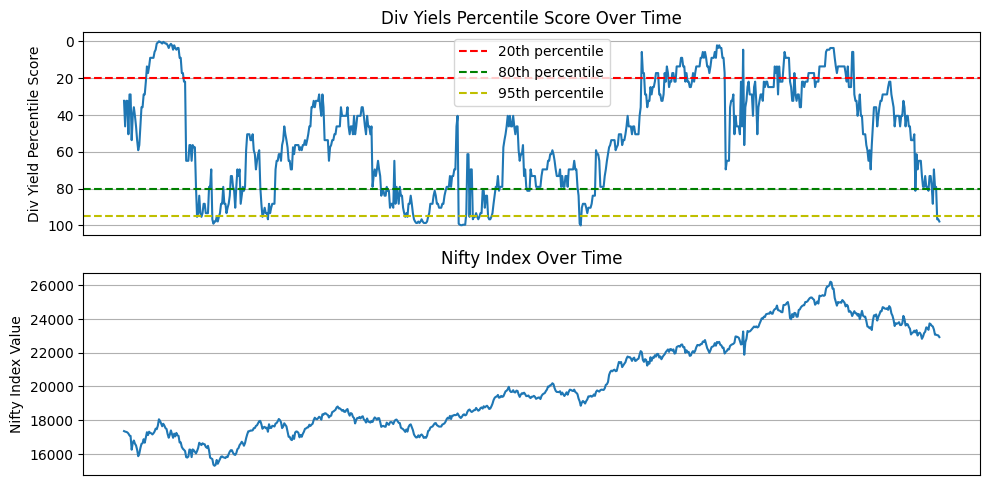

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with columns: 'pe_percentile' and 'nifty'
# If it's not, you might need to prepare your data accordingly

# Create the plot with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5), sharex=True)

# Plot PE Percentile Score
ax1.plot(data['pe_percentile'].tail(1800))
ax1.set_title('Div Yiels Percentile Score Over Time')
ax1.set_ylabel('Div Yield Percentile Score')
ax1.grid(True)
ax1.axhline(y=20, color='r', linestyle='--', label='20th percentile')
ax1.axhline(y=80, color='g', linestyle='--', label='80th percentile')
ax1.axhline(y=95, color='y', linestyle='--', label='95th percentile')
ax1.legend()

# Plot Nifty Index
ax2.plot(data['Close'].tail(1800))
ax2.set_title('Nifty Index Over Time')
ax2.set_ylabel('Nifty Index Value')
ax2.grid(True)

# Remove x-axis ticks and labels
ax1.xaxis.set_major_locator(plt.NullLocator())
ax1.xaxis.set_minor_locator(plt.NullLocator())
ax2.xaxis.set_major_locator(plt.NullLocator())
ax2.xaxis.set_minor_locator(plt.NullLocator())
ax1.invert_yaxis()
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [23]:
data=data.tail(1200)

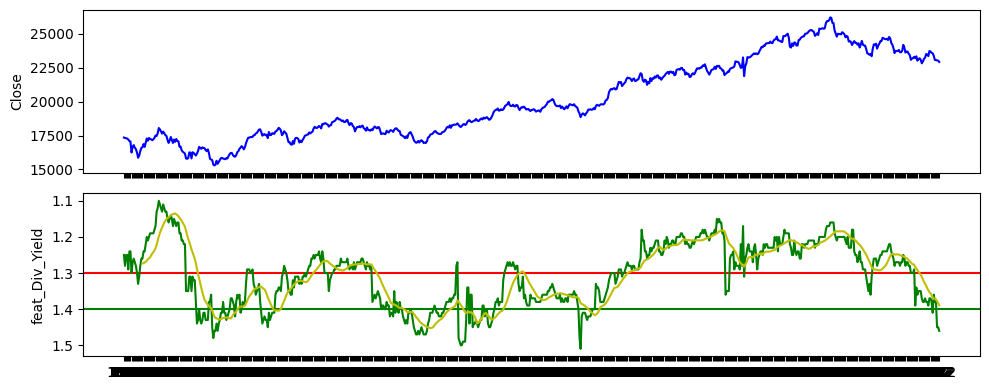

In [24]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
axs[1].axhline(y=1.4,color='g');
axs[1].axhline(y=1.3,color='r');
# Plot 'Close'
axs[0].plot(data['Close'], color='b')
axs[0].set_ylabel('Close')

# Plot 'Div Yield'
axs[1].plot( data['feat_Div_Yield'],  color='g')
axs[1].set_ylabel('feat_Div_Yield')
axs[1].plot(data['mov50'],color='y')
axs[1].invert_yaxis()
# Format date on x-axis to show only month and year
date_format = mdates.DateFormatter('%Y')
axs[1].xaxis.set_major_formatter(date_format)

# Display the plot
plt.tight_layout()
plt.show()